In [61]:
import snscrape.modules.twitter as sntwitter #Used snscrape to pull old tweets
import snscrape
import pandas as pd
import numpy as np
import string
import os

import re
import emoji
import requests
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings

from tqdm.notebook import tqdm

warnings.filterwarnings("ignore")

from textblob import TextBlob 

In [62]:
# Using TwitterSearchScraper to scrape data from New York
df1 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    '#ubereats near:"New York" within:10000km since:2022-01-31 until:2022-03-31 lang:en ').get_items(),500))

In [63]:
 # Using TwitterSearchScraper to scrape data from Los Angeles
df2 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'ubereats near:"Los Angeles" within:10000km since:2022-01-31 until:2022-03-31 lang:en ').get_items(),20000))

In [64]:
 # Using TwitterSearchScraper to scrape data from Texas
df3 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'ubereats near:"Texas" within:10000km since:2022-01-31 until:2022-03-31 lang:en ').get_items(),20000))

In [65]:
 # Using TwitterSearchScraper to scrape data from Florida
df4 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'ubereats near:"Florida" within:10000km since:2022-01-31 until:2022-03-31 lang:en ').get_items(),20000))

In [66]:
 # Using TwitterSearchScraper to scrape data from Alaska
df5 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'ubereats near:"Alaska" within:10000km since:2022-01-31 until:2022-03-31 lang:en ').get_items(),20000))

In [67]:
 # Using TwitterSearchScraper to scrape data from North Dakota
df6 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'ubereats near:"North Dakota" within:10000km since:2022-01-31 until:2022-03-31 lang:en ').get_items(),20000))

In [68]:
 # Using TwitterSearchScraper to scrape data from District of Columbia
df7 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'ubereats near:"District of Columbia" within:10000km since:2022-01-31 until:2022-03-31 lang:en ').get_items(),20000))

In [69]:
def dataf(df):
    df = df[df['lang'] == 'en']
    user = dict(df.user)
    user = pd.DataFrame(user).T
    place = dict(df.place)
    place = pd.DataFrame(place).T
    coordinates = dict(df.coordinates)
    coordinates = pd.DataFrame(coordinates).T
    a = list(place['fullName'])
    df.insert(2,"UserLoc",a,True)
    df[['username','description','followersCount']] = user[['username','description','followersCount']]
    df['longitude'] = coordinates['longitude']
    df['latitude'] = coordinates['latitude']
    df.drop(['user','place','renderedContent','conversationId','lang','source', 'sourceUrl', 'sourceLabel', 'outlinks', 'tcooutlinks',
           'media', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId','inReplyToUser','cashtags','mentionedUsers',
             'coordinates'],axis=1,inplace=True)
    df = df.dropna(subset= ['longitude'])
    return df

In [70]:
df1 = dataf(df1)
df1.to_csv("df1.csv",index=False)

In [71]:
df2 = dataf(df2)
df2.to_csv("df2.csv",index=False)

In [72]:
df3 = dataf(df3)
df3.to_csv("df3.csv",index=False)

In [73]:
df4 = dataf(df4)
df4.to_csv("df4.csv",index=False)

In [74]:
df5 = dataf(df5)
df5.to_csv("df5.csv",index=False)

In [75]:
df6 = dataf(df6)
df6.to_csv("df6.csv",index=False)

In [76]:
df7 = dataf(df7)
df7.to_csv("df7.csv",index=False)

In [77]:
df = pd.DataFrame()
files = [file for file in os.listdir('./data')]
for file in files:
    df1 = pd.read_csv('./data/'+file)
    df = pd.concat([df, df1])

df.head()

,url,date,UserLoc,content,id,replyCount,retweetCount,likeCount,quoteCount,hashtags,...,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,cashtags
0,https://twitter.com/calayfornia/status/1509317...,2022-03-30 23:52:48+00:00,"Baltimore, MD",Uber eats playing. Where is my fuckin sushi,1509317750396702728,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://twitter.com/withrowmichael/status/1509...,2022-03-30 21:43:18+00:00,"Piney Green, NC","Wish I could, but I have to work... can't watc...",1509285161564790786,2,0,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://twitter.com/LifeByDesi/status/15092636...,2022-03-30 20:18:00+00:00,"Brooklyn, NY","UberEats, Grubhub, Doordash, ChowNow and whoev...",1509263697012834305,0,0,2,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://twitter.com/EvaMarieKing/status/150924...,2022-03-30 19:21:13+00:00,"Queens, NY",#VibesNYC1 is on Twitter as @ClubVibeBarCafe p...,1509249407212003334,0,0,0,0,['VibesNYC1'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://twitter.com/yoursunny/status/150920536...,2022-03-30 16:26:14+00:00,"Gaithersburg, MD",Just after I placed this #UberEats order with ...,1509205369125548036,0,0,0,0,['UberEats'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df.shape

(8433, 33)

In [79]:
 df = df.drop_duplicates() 

In [80]:
df.shape

(3026, 33)

In [81]:
df['engagement rate'] = (df['likeCount'] + df['retweetCount'])/df['followersCount']

In [82]:
#A function to extract hashtags from a tweet
def hashtags(tweet):
    tweet = tweet.lower()
    tweet_regex = re.findall(r'#\w+', tweet)
    return ' '.join(tweet_regex)

In [83]:
#A function to extract mentioned users from a tweet
def mentions(tweet):
    tweet = tweet.lower()
    tweet_regex = re.findall(r'@\w+', tweet)
    return ' '.join(tweet_regex)

In [84]:
df['Hashtags'] = df['content'].apply(hashtags)
df['MentionedUsers'] = df['content'].apply(mentions)

In [85]:
#A function used to count hashtags, mentioned users and characters
def count(terms):
    terms = str(terms)
    term_list = df[terms].tolist()
    tweet_list = []

    for term in term_list:
        items = term.split()
        for item in items:
            tweet_list.append(item)
        
    term_count = Counter(tweet_list)
    term_count_df = pd.DataFrame.from_dict(term_count, orient='index').reset_index()
    term_count_df.columns = [terms, 'Count']
    term_count_df.sort_values('Count', ascending=False, inplace=True)
    term_count_df.reset_index(inplace=True, drop='True')
    
    tweet_string = ' '.join(tweet_list)
    
    #Returns a dataframe (consisting of values and counts) and a string containing the values
    return term_count_df, tweet_string

In [86]:
hash_count_df, hash_string = count('Hashtags')

In [87]:
hash_count_df.head(10)

,Hashtags,Count
0,#ubereats,194
1,#doordash,58
2,#superbowl,43
3,#freshandhealthy,42
4,#grubhub,37
5,#supportlocal,35
6,#pie,34
7,#washingtondc,34
8,#madefromscratch,34
9,#smallbatch,34


In [88]:
mentions_count_df, mentions_string = count('MentionedUsers')
mentions_count_df.head(10)

,MentionedUsers,Count
0,@ubereats,945
1,@doordash,144
2,@grubhub,104
3,@uber_support,73
4,@postmates,66
5,@uber,58
6,@blackandmobile1,30
7,@doordash_help,19
8,@thenourishspot,18
9,@trevornoah,17


In [89]:
def cleanedtweet(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '',str(text))
    text = re.sub(r'#','',str(text))
    text = re.sub(r'RT : ', '',str(text))
    text = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '',str(text))
    text = re.sub('\n','',str(text))
    text = re.sub(r'\b(?:{})\b','',str(text))
    text = re.sub(r'\s+', ' ',str(text))
    text = re.sub(r'bit.ly/\S+', '', str(text))
    text = re.sub('([_]+)', "", str(text))
    return text

In [90]:
df['ProcessedText'] = df['content'].apply(cleanedtweet)

In [91]:
# remove stopwords
def removeStopWords(str):
    cachedStopWords = set(stopwords.words("english"))
    cachedStopWords.update(('and','I','A','http','And','So','arnt','This','When','It','many','Many','so','cant','Yes','yes','No','no','These','these'))
    new_str = ' '.join([word for word in str.split() if word not in cachedStopWords])
    return new_str

In [92]:
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO

In [93]:
def remove_emoji(text): #remove emojis
    return emoji.get_emoji_regexp().sub(u'', text)

In [94]:
import nest_asyncio

nest_asyncio.apply()

In [95]:
# remove non ascii character
def non_ascii(s):
    return "".join(i for i in s if ord(i)<128)


In [96]:
df['ProcessedText'] = df['ProcessedText'].apply(removeStopWords)
df['ProcessedText'] = df['ProcessedText'].apply(remove_emoji)
df['ProcessedText'] = df['ProcessedText'].apply(non_ascii)

In [97]:
def Sujectivity_score(txt):
    return TextBlob(txt).sentiment.subjectivity

In [98]:
def Polarity_score(txt):
    return TextBlob(txt).sentiment.polarity

In [99]:
df['polarity_score'] = df['ProcessedText'].apply(Polarity_score)
df['subjectivity_score'] = df['ProcessedText'].apply(Sujectivity_score)

In [100]:
def subjectivity(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

In [101]:
def polarity(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

In [102]:
df['polarity'] = df['polarity_score'].apply(polarity)
df['subjectivity'] = df['subjectivity_score'].apply(subjectivity)

In [103]:
df.head()

,url,date,UserLoc,content,id,replyCount,retweetCount,likeCount,quoteCount,hashtags,...,place,cashtags,engagement rate,Hashtags,MentionedUsers,ProcessedText,polarity_score,subjectivity_score,polarity,subjectivity
0,https://twitter.com/calayfornia/status/1509317...,2022-03-30 23:52:48+00:00,"Baltimore, MD",Uber eats playing. Where is my fuckin sushi,1509317750396702728,0,0,0,0,NaN,...,NaN,NaN,0.000000,,,Uber eats playing. Where fuckin sushi,0.000,0.000000,neutral,neutral
1,https://twitter.com/withrowmichael/status/1509...,2022-03-30 21:43:18+00:00,"Piney Green, NC","Wish I could, but I have to work... can't watc...",1509285161564790786,2,0,1,0,NaN,...,NaN,NaN,0.000931,,,"Wish could, work... can't watch driving doorda...",0.000,0.000000,neutral,neutral
2,https://twitter.com/LifeByDesi/status/15092636...,2022-03-30 20:18:00+00:00,"Brooklyn, NY","UberEats, Grubhub, Doordash, ChowNow and whoev...",1509263697012834305,0,0,2,0,NaN,...,NaN,NaN,0.000581,,,"UberEats, Grubhub, Doordash, ChowNow whoever e...",0.475,0.383333,positive,positive
3,https://twitter.com/EvaMarieKing/status/150924...,2022-03-30 19:21:13+00:00,"Queens, NY",#VibesNYC1 is on Twitter as @ClubVibeBarCafe p...,1509249407212003334,0,0,0,0,['VibesNYC1'],...,NaN,NaN,0.000000,#vibesnyc1,@clubvibebarcafe,VibesNYC1 Twitter place delivery orders Grub H...,0.050,0.050000,positive,positive
4,https://twitter.com/yoursunny/status/150920536...,2022-03-30 16:26:14+00:00,"Gaithersburg, MD",Just after I placed this #UberEats order with ...,1509205369125548036,0,0,0,0,['UberEats'],...,NaN,NaN,0.000000,#ubereats,@thaitaniumrest,"Just placed UberEats order $5 coupon, received...",0.000,0.000000,neutral,neutral


In [104]:
import text2emotion as te

In [105]:
def emotion_detection(x):
    emotion_value = te.get_emotion(x)
    keymax_value = max(zip(emotion_value.values(),emotion_value.keys()))[1]
    return keymax_value

In [106]:
df['emotions'] = df['ProcessedText'].apply(emotion_detection)

In [107]:
df.head()

,url,date,UserLoc,content,id,replyCount,retweetCount,likeCount,quoteCount,hashtags,...,cashtags,engagement rate,Hashtags,MentionedUsers,ProcessedText,polarity_score,subjectivity_score,polarity,subjectivity,emotions
0,https://twitter.com/calayfornia/status/1509317...,2022-03-30 23:52:48+00:00,"Baltimore, MD",Uber eats playing. Where is my fuckin sushi,1509317750396702728,0,0,0,0,NaN,...,NaN,0.000000,,,Uber eats playing. Where fuckin sushi,0.000,0.000000,neutral,neutral,Fear
1,https://twitter.com/withrowmichael/status/1509...,2022-03-30 21:43:18+00:00,"Piney Green, NC","Wish I could, but I have to work... can't watc...",1509285161564790786,2,0,1,0,NaN,...,NaN,0.000931,,,"Wish could, work... can't watch driving doorda...",0.000,0.000000,neutral,neutral,Fear
2,https://twitter.com/LifeByDesi/status/15092636...,2022-03-30 20:18:00+00:00,"Brooklyn, NY","UberEats, Grubhub, Doordash, ChowNow and whoev...",1509263697012834305,0,0,2,0,NaN,...,NaN,0.000581,,,"UberEats, Grubhub, Doordash, ChowNow whoever e...",0.475,0.383333,positive,positive,Fear
3,https://twitter.com/EvaMarieKing/status/150924...,2022-03-30 19:21:13+00:00,"Queens, NY",#VibesNYC1 is on Twitter as @ClubVibeBarCafe p...,1509249407212003334,0,0,0,0,['VibesNYC1'],...,NaN,0.000000,#vibesnyc1,@clubvibebarcafe,VibesNYC1 Twitter place delivery orders Grub H...,0.050,0.050000,positive,positive,Fear
4,https://twitter.com/yoursunny/status/150920536...,2022-03-30 16:26:14+00:00,"Gaithersburg, MD",Just after I placed this #UberEats order with ...,1509205369125548036,0,0,0,0,['UberEats'],...,NaN,0.000000,#ubereats,@thaitaniumrest,"Just placed UberEats order $5 coupon, received...",0.000,0.000000,neutral,neutral,Surprise


In [108]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Define keywords and their corresponding segments
keywords = {
    'Fee or charges': ['cost', 'charged','fee','price','refund','afford','deduct','deducted','pay'],
    'Late delivery': ['wait', 'waiting', 'waited','long','delay','delayed'],
    'Cancelled Order': ['cancel', 'cancelled','void','voided'],
    'Wrong delivery': ['wrong', 'incorrect','address','mix-up','mix up'],
    'Customer Service': ['care', 'assistance','complaint','hotline','support','service'],
    'Driver': ['driver', 'professionalism','guy']
}

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define function to classify text based on keywords
def classify_text(text):
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Initialize segments
    segments = []
    # Loop through keywords and check if they appear in text
    for segment, words in keywords.items():
        for word in words:
            if word in lemmatized_tokens:
                segments.append(segment)
                break
    # If no segment found, classify as 'other'
    if not segments:
        segments.append('other')
    # If more than one segment found, return only the first segment
    if len(segments) > 1:
        segments = [segments[0]]
    # Return segments as a string
    return ', '.join(segments)


In [109]:
# Apply classification function to each row in dataframe
df['segments'] = df['content'].apply(classify_text)

In [110]:
df.head()

,url,date,UserLoc,content,id,replyCount,retweetCount,likeCount,quoteCount,hashtags,...,engagement rate,Hashtags,MentionedUsers,ProcessedText,polarity_score,subjectivity_score,polarity,subjectivity,emotions,segments
0,https://twitter.com/calayfornia/status/1509317...,2022-03-30 23:52:48+00:00,"Baltimore, MD",Uber eats playing. Where is my fuckin sushi,1509317750396702728,0,0,0,0,NaN,...,0.000000,,,Uber eats playing. Where fuckin sushi,0.000,0.000000,neutral,neutral,Fear,other
1,https://twitter.com/withrowmichael/status/1509...,2022-03-30 21:43:18+00:00,"Piney Green, NC","Wish I could, but I have to work... can't watc...",1509285161564790786,2,0,1,0,NaN,...,0.000931,,,"Wish could, work... can't watch driving doorda...",0.000,0.000000,neutral,neutral,Fear,other
2,https://twitter.com/LifeByDesi/status/15092636...,2022-03-30 20:18:00+00:00,"Brooklyn, NY","UberEats, Grubhub, Doordash, ChowNow and whoev...",1509263697012834305,0,0,2,0,NaN,...,0.000581,,,"UberEats, Grubhub, Doordash, ChowNow whoever e...",0.475,0.383333,positive,positive,Fear,Driver
3,https://twitter.com/EvaMarieKing/status/150924...,2022-03-30 19:21:13+00:00,"Queens, NY",#VibesNYC1 is on Twitter as @ClubVibeBarCafe p...,1509249407212003334,0,0,0,0,['VibesNYC1'],...,0.000000,#vibesnyc1,@clubvibebarcafe,VibesNYC1 Twitter place delivery orders Grub H...,0.050,0.050000,positive,positive,Fear,other
4,https://twitter.com/yoursunny/status/150920536...,2022-03-30 16:26:14+00:00,"Gaithersburg, MD",Just after I placed this #UberEats order with ...,1509205369125548036,0,0,0,0,['UberEats'],...,0.000000,#ubereats,@thaitaniumrest,"Just placed UberEats order $5 coupon, received...",0.000,0.000000,neutral,neutral,Surprise,other


In [111]:
df['description'] = df['description'].apply(cleanedtweet)
df['description'] = df['description'].apply(removeStopWords)
df['description'] = df['description'].apply(remove_emoji)
df['description'] = df['description'].apply(non_ascii)

In [112]:
df.head()

,url,date,UserLoc,content,id,replyCount,retweetCount,likeCount,quoteCount,hashtags,...,engagement rate,Hashtags,MentionedUsers,ProcessedText,polarity_score,subjectivity_score,polarity,subjectivity,emotions,segments
0,https://twitter.com/calayfornia/status/1509317...,2022-03-30 23:52:48+00:00,"Baltimore, MD",Uber eats playing. Where is my fuckin sushi,1509317750396702728,0,0,0,0,NaN,...,0.000000,,,Uber eats playing. Where fuckin sushi,0.000,0.000000,neutral,neutral,Fear,other
1,https://twitter.com/withrowmichael/status/1509...,2022-03-30 21:43:18+00:00,"Piney Green, NC","Wish I could, but I have to work... can't watc...",1509285161564790786,2,0,1,0,NaN,...,0.000931,,,"Wish could, work... can't watch driving doorda...",0.000,0.000000,neutral,neutral,Fear,other
2,https://twitter.com/LifeByDesi/status/15092636...,2022-03-30 20:18:00+00:00,"Brooklyn, NY","UberEats, Grubhub, Doordash, ChowNow and whoev...",1509263697012834305,0,0,2,0,NaN,...,0.000581,,,"UberEats, Grubhub, Doordash, ChowNow whoever e...",0.475,0.383333,positive,positive,Fear,Driver
3,https://twitter.com/EvaMarieKing/status/150924...,2022-03-30 19:21:13+00:00,"Queens, NY",#VibesNYC1 is on Twitter as @ClubVibeBarCafe p...,1509249407212003334,0,0,0,0,['VibesNYC1'],...,0.000000,#vibesnyc1,@clubvibebarcafe,VibesNYC1 Twitter place delivery orders Grub H...,0.050,0.050000,positive,positive,Fear,other
4,https://twitter.com/yoursunny/status/150920536...,2022-03-30 16:26:14+00:00,"Gaithersburg, MD",Just after I placed this #UberEats order with ...,1509205369125548036,0,0,0,0,['UberEats'],...,0.000000,#ubereats,@thaitaniumrest,"Just placed UberEats order $5 coupon, received...",0.000,0.000000,neutral,neutral,Surprise,other


In [113]:
df.shape

(3026, 43)

In [114]:
df['segments'].value_counts()

other               2344
Driver               215
Fee or charges       211
Customer Service      97
Late delivery         89
Wrong delivery        54
Cancelled Order       16
Name: segments, dtype: int64

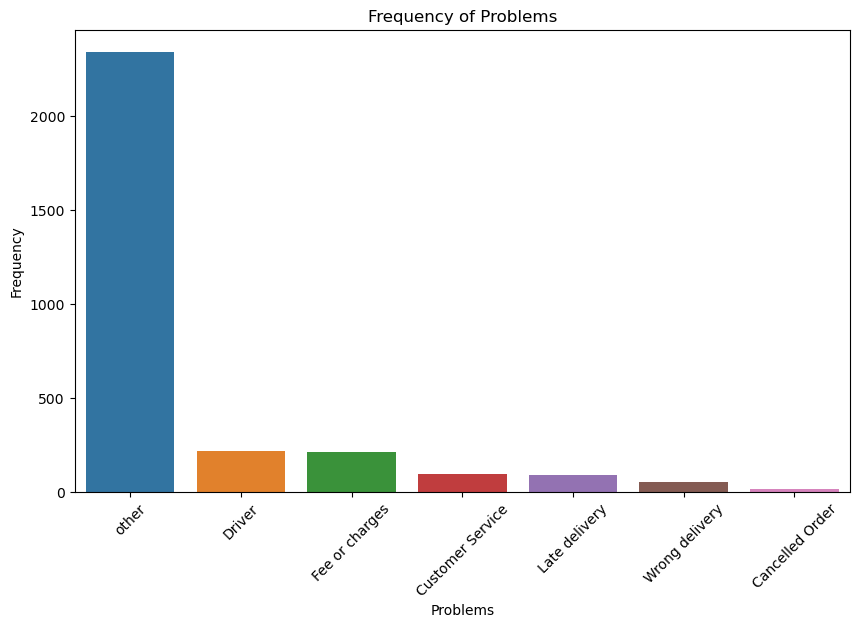

In [115]:
# Frequency of problems
problem_freq = df['segments'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=problem_freq.index, y=problem_freq.values)
plt.title('Frequency of Problems')
plt.xlabel('Problems')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.savefig("Engagement Rate per segments")
plt.show()

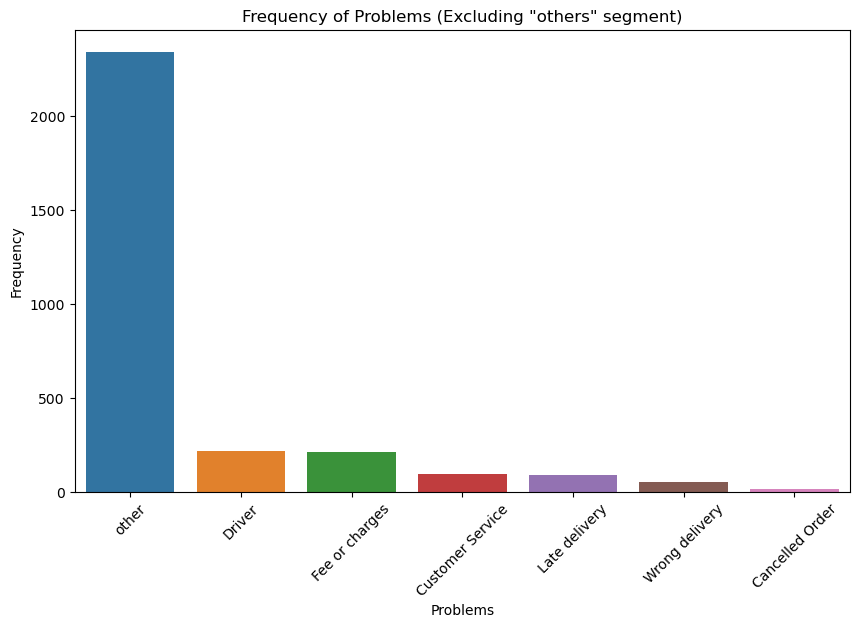

In [116]:
# Filter out the 'others' segment
problem_freqx = df[df['segments'] != 'others']['segments'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=problem_freqx.index, y=problem_freqx.values)
plt.title('Frequency of Problems (Excluding "others" segment)')
plt.xlabel('Problems')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

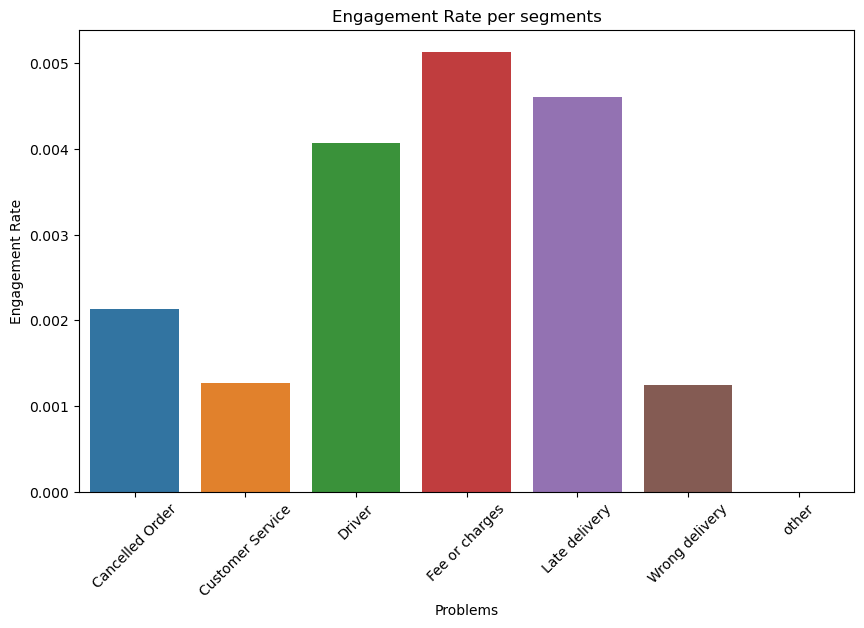

In [117]:
engagement_rate = df.groupby('segments')['engagement rate'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=engagement_rate.index, y=engagement_rate.values)
plt.title('Engagement Rate per segments')
plt.xlabel('Problems')
plt.ylabel('Engagement Rate')
plt.xticks(rotation=45)
plt.savefig("Engagement Rate per segments")
plt.show()

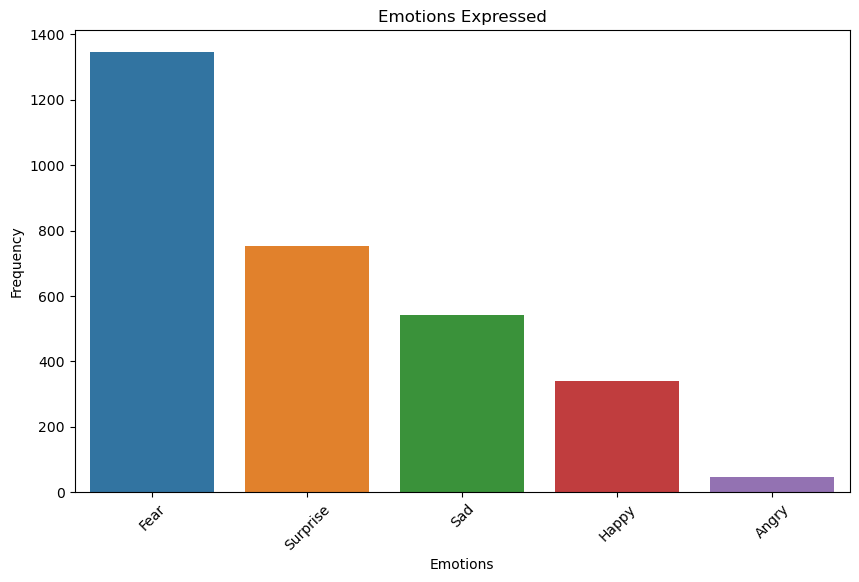

In [118]:
# Emotions expressed
emotion_freq = df['emotions'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_freq.index, y=emotion_freq.values)
plt.title('Emotions Expressed')
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.savefig("Emotions Expressed")
plt.show()

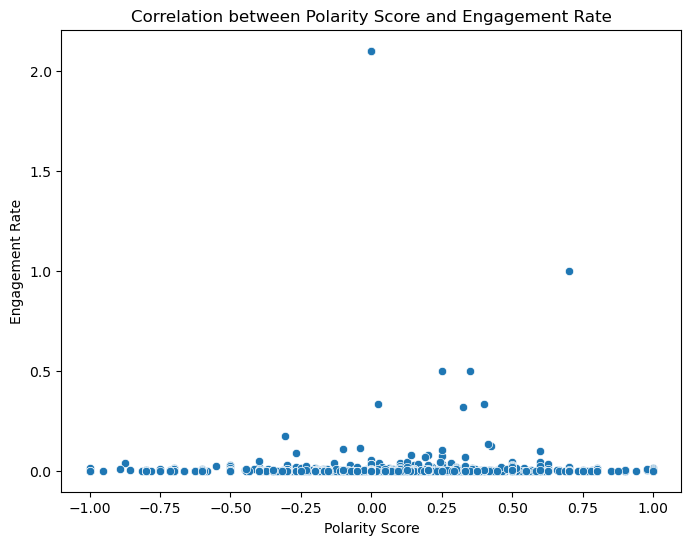

In [119]:
# Correlation between polarity score and engagement rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='polarity_score', y='engagement rate', data=df)
plt.title('Correlation between Polarity Score and Engagement Rate')
plt.xlabel('Polarity Score')
plt.ylabel('Engagement Rate')
plt.show()

In [120]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Function to generate word cloud for a given segment
def generate_wordcloud(segment):
    segment_data = df[df['segments'] == segment]
    text = ' '.join(segment_data['ProcessedText'])
    
    # Remove specific keywords from the text
    keywords_to_remove = ['ubereats', 'uber', 'eats', 'order', 'ordered', 'food', 'postmates']
    for keyword in keywords_to_remove:
        text = re.sub(r'\b' + keyword + r'\b', '', text, flags=re.IGNORECASE)
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {segment}')
    plt.axis('off')
    
    # Save the word cloud as an image
    image_filename = f'wordcloud_{segment}.png'
    plt.savefig(image_filename, bbox_inches='tight')
    plt.close()
    
    print(f'Saved word cloud for {segment} as {image_filename}')

# Generate word clouds for each segment
segments = df['segments'].unique()
for segment in segments:
    generate_wordcloud(segment)


Saved word cloud for other as wordcloud_other.png
Saved word cloud for Driver as wordcloud_Driver.png
Saved word cloud for Customer Service as wordcloud_Customer Service.png
Saved word cloud for Fee or charges as wordcloud_Fee or charges.png
Saved word cloud for Wrong delivery as wordcloud_Wrong delivery.png
Saved word cloud for Cancelled Order as wordcloud_Cancelled Order.png
Saved word cloud for Late delivery as wordcloud_Late delivery.png


In [121]:
import os
import matplotlib.pyplot as plt

# Define a function to visualize top hashtags and save the plot
def visualize_top_hashtags(segment):
    segment_data = df[df['segments'] == segment]
    hashtag_counts = segment_data['Hashtags'].str.split().explode().value_counts().head(10)
    
    plt.figure(figsize=(10, 6))
    plt.bar(hashtag_counts.index, hashtag_counts.values)
    plt.title(f'Top 10 Hashtags for {segment}')
    plt.xlabel('Hashtags')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    # Save the plot as an image file
    image_filename = f'top_hashtags_{segment}.png'
    plt.savefig(image_filename, bbox_inches='tight')
    plt.close()
    
    print(f'Saved top hashtags plot for {segment} as {image_filename}')

# Create a directory to save the images (if it doesn't already exist)
output_dir = 'visualization_outputs'
os.makedirs(output_dir, exist_ok=True)

# Visualize top hashtags for each segment and save the plots
segments = df['segments'].unique()
for segment in segments:
    visualize_top_hashtags(segment)


Saved top hashtags plot for other as top_hashtags_other.png
Saved top hashtags plot for Driver as top_hashtags_Driver.png
Saved top hashtags plot for Customer Service as top_hashtags_Customer Service.png
Saved top hashtags plot for Fee or charges as top_hashtags_Fee or charges.png
Saved top hashtags plot for Wrong delivery as top_hashtags_Wrong delivery.png
Saved top hashtags plot for Cancelled Order as top_hashtags_Cancelled Order.png
Saved top hashtags plot for Late delivery as top_hashtags_Late delivery.png


In [126]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the words
words = ['cost', 'charged', 'fee', 'price', 'refund', 'afford', 'deduct', 'deducted', 'pay',
         'wait', 'waiting', 'waited', 'long', 'delay', 'delayed',
         'cancel', 'cancelled', 'void', 'voided',
         'wrong', 'incorrect', 'address', 'mix-up', 'mix up',
         'care', 'assistance', 'complaint', 'hotline', 'support', 'service',
         'driver', 'professionalism', 'guy']

# Count the occurrence of each word
word_count = {}
for word in words:
    word_count[word] = df['content'].str.count(word, flags=re.IGNORECASE).sum()

# Create a DataFrame for the word counts
df_word_count = pd.DataFrame.from_dict(word_count, orient='index', columns=['Count'])
df_word_count.sort_values('Count', ascending=False, inplace=True)

# Generate the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_word_count.index, df_word_count['Count'])
plt.title('Count of Words')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Save the chart as an image file
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)
chart_filename = 'word_count_bar_chart.png'
chart_filepath = os.path.join(output_dir, chart_filename)

plt.savefig(chart_filepath, bbox_inches='tight')
plt.close()

print(f'Saved word count bar chart as {chart_filename}')


Saved word count bar chart as word_count_bar_chart.png


In [129]:
import matplotlib.pyplot as plt
import pandas as pd

# Chart for tweet frequency by location (top 10)
top_10_locations = df['UserLoc'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_10_locations.plot(kind='bar')
plt.title('Tweet Frequency by Location (Top 10)')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()

# Save the chart as an image file
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)
chart_filename1 = 'tweet_frequency_by_location_top_10.png'
chart_filepath1 = os.path.join(output_dir, chart_filename1)

plt.savefig(chart_filepath1)
plt.close()

print(f'Saved tweet frequency by location (top 10) chart as {chart_filename1}')

# Chart for tweet frequency by location (top 10) for various segments
segments = df['segments'].unique()

for segment in segments:
    segment_data = df[df['segments'] == segment]
    top_10_locations_segment = segment_data['UserLoc'].value_counts().head(10)

    plt.figure(figsize=(10, 6))
    top_10_locations_segment.plot(kind='bar')
    plt.title(f'Tweet Frequency by Location (Top 10) - {segment}')
    plt.xlabel('Location')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.tight_layout()

    # Save the chart as an image file
    chart_filename2 = f'tweet_frequency_by_location_top_10_{segment}.png'
    chart_filepath2 = os.path.join(output_dir, chart_filename2)

    plt.savefig(chart_filepath2)
    plt.close()

    print(f'Saved tweet frequency by location (top 10) chart for segment "{segment}" as {chart_filename2}')


Saved tweet frequency by location (top 10) chart as tweet_frequency_by_location_top_10.png
Saved tweet frequency by location (top 10) chart for segment "other" as tweet_frequency_by_location_top_10_other.png
Saved tweet frequency by location (top 10) chart for segment "Driver" as tweet_frequency_by_location_top_10_Driver.png
Saved tweet frequency by location (top 10) chart for segment "Customer Service" as tweet_frequency_by_location_top_10_Customer Service.png
Saved tweet frequency by location (top 10) chart for segment "Fee or charges" as tweet_frequency_by_location_top_10_Fee or charges.png
Saved tweet frequency by location (top 10) chart for segment "Wrong delivery" as tweet_frequency_by_location_top_10_Wrong delivery.png
Saved tweet frequency by location (top 10) chart for segment "Cancelled Order" as tweet_frequency_by_location_top_10_Cancelled Order.png
Saved tweet frequency by location (top 10) chart for segment "Late delivery" as tweet_frequency_by_location_top_10_Late deliver

In [131]:
import matplotlib.pyplot as plt
import pandas as pd

# Bar chart for overall polarity
polarity_counts = df['polarity'].value_counts()

plt.figure(figsize=(10, 6))
polarity_counts.plot(kind='bar')
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Count')

# Save the chart as an image file
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)
chart_filename1 = 'polarity_distribution.png'
chart_filepath1 = os.path.join(output_dir, chart_filename1)

plt.savefig(chart_filepath1)
plt.close()

print(f'Saved polarity distribution chart as {chart_filename1}')

Saved polarity distribution chart as polarity_distribution.png
